# Análise de Sentimentos em Reviews do IMDb

O principal objetivo desta tarefa é aplicar três modelos de aprendizado de máquina distintos - **Regressão Linear, Naive Bayes e Perceptron** - para realizar a análise de sentimento em um conjunto de dados de *reviews* de usuários sobre filmes no IMDb. Ao final desta tarefa, você deverá ter uma compreensão mais profunda de como esses modelos funcionam, suas vantagens e limitações quando aplicados a dados textuais do mundo real. Este conjunto de dados inclui avaliações de texto juntamente com rótulos de sentimento correspondentes (positivo ou negativo) para a aprendizagem supervisionada.

## Bibliotecas

In [ ]:
# Para a leitura dos dados
import pandas as pd

# Manipulação de texto
import nltk.corpus
from nltk                             import SnowballStemmer
from nltk.tokenize                    import word_tokenize
from nltk.corpus                      import stopwords

nltk.download('stopwords')
nltk.download('punkt')

# Prepraração dos dados
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.model_selection          import train_test_split

# Modelos de classificação
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import MultinomialNB

# Avaliação
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Leitura dos dados

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/issilva5/44c9406a85b0fed0d62668752cc31b09/raw/49e01d2e8011bdd83d0bc835a518e398ae319303/movie_reviews.csv')
df.head()

,content,sentiment
0,now i wont deny that when i purchased this off...,neg
1,the saddest thing about this tribute is that a...,neg
2,last night i decided to watch the prequel or s...,neg
3,i have to admit that i liked the first half of...,neg
4,i was not impressed about this film especially...,neg


Os dados estão distribuídos em duas classes:

In [ ]:
df.groupby('sentiment').count()

,content
sentiment,
neg,12500
pos,12500


A seguir criaremos uma lista com o texto.

In [ ]:
corpus = df['content'].tolist()

## Limpeza dos dados

Antes de aplicar modelos de aprendizado de máquina, você precisará limpar e pré-processar os dados textuais. É esperado que você aplique pelo menos as seguintes tarefas de limpeza dos dados:

- Tokenização
- Remoção de palavras muito pequenas (<= 2) ou muito grandes (>= 15).
- Remoção de stopwords.
- Stemming.

In [ ]:
def remove_palavras_pequenas_grandes(tokens):
  # Implemente uma função que recebe uma lista de tokens
  # e retorna uma lista sem os tokens muito pequenos (<= 2)
  # ou muito grandes (> 15).
  return [t for t in tokens if len(t) > 2 and len(t) < 15]

def remove_stopwords(tokens):
  # Implemente uma função que recebe uma lista de tokens
  # e retorna uma lista sem stopwords.
  stop_words = set(stopwords.words('english'))
  return [t for t in tokens if t.lower() not in stop_words]

def stemming(tokens):
  # Implemente uma função que recebe uma lista de tokens
  # e retorna uma lista com os tokens stemmizados.
  stemming = SnowballStemmer('english')
  document = [stemming.stem(t) for t in tokens]
  return document


In [ ]:
def process_corpus(corpus):
  corpus_processed = []
  for document in corpus:
    tokens = word_tokenize(document)
    tokens = remove_palavras_pequenas_grandes(tokens)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    corpus_processed.append(" ".join(tokens))
  return corpus_processed

corpus_processed = process_corpus(corpus)

In [ ]:
print('Texto original:', df['content'].tolist()[0])
print()
print('Texto processado:', corpus_processed[0])

Texto original: now i wont deny that when i purchased this off ebay i had high expectations this was an incredible outofprint work from the master of comedy that i so enjoy however i was soon to be disappointed apologies to those who enjoyed it but i just found the compleat al to be very difficult to watch i got a few smiles sure but the majority of the funny came from the music videos which ive got on dvd and the rest was basically filler you could tell that this was not als greatest video achievement that honor goes to uhf honestly i doubt if this will ever make the jump to dvd so if youre an ultrahardcore al fan and just have to own everything buy the tape off ebay just dont pay too much for it

Texto processado: wont deni purchas ebay high expect incred outofprint work master comedi enjoy howev soon disappoint apolog enjoy found compleat difficult watch got smile sure major funni came music video ive got dvd rest basic filler could tell al greatest video achiev honor goe uhf honest

## Preparando os dados para os modelos

Primeiramente, realize a vetorização TF-IDF dos dados.

In [ ]:
# Você deve instanciar um vetorizador TF-IDF e aplicá-lo ao corpus processado.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_processed)
y = df['sentiment'].to_numpy()

Agora, realize a partição treino e teste dos dados.

In [ ]:
# Você deve realizar a partição treino e teste dos dados aqui.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

## Treinando modelos

Finalmente, instancie e treine os três modelos (Regressão Logística, Naive Bayes e Perceptron).

In [ ]:
# Você deve instanciar e treinar os três modelos de Regressão Logística
# Regressão logística
model_rl = LogisticRegression(random_state=0).fit(X_train, y_train)

# Naive Bayes
model_nb = MultinomialNB().fit(X_train, y_train)

# Perceptron
model_p = Perceptron().fit(X_train, y_train)

## Avaliação dos modelos

Você deve realizar as predições para cada um dos três modelos.

In [ ]:
# Realize as predições para cada um dos modelos
y_pred_rl = model_rl.predict(X_test)
y_pred_nb = model_nb.predict(X_test)
y_pred_p = model_p.predict(X_test)


print('Previsões do modelo de Regressão Logística: \n', y_pred_rl[:10])
print('Previsões do modelo de Naive Bayes: \n', y_pred_nb[:10])
print('Previsões do modelo de Perceptron: \n', y_pred_p[:10])

Previsões do modelo de Regressão Logística: 
 ['neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'pos']
Previsões do modelo de Naive Bayes: 
 ['neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos']
Previsões do modelo de Perceptron: 
 ['neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'pos']


Plote a matriz de confusão para cada modelo.

In [ ]:
# Faça o plot da matriz de confusão de contagem para cada um dos modelos.
# função para fazer o plot da matriz
def plot_confusion_matrix(y_true, y_pred, title, labels=None) -> None:
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(len(labels), len(labels)))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


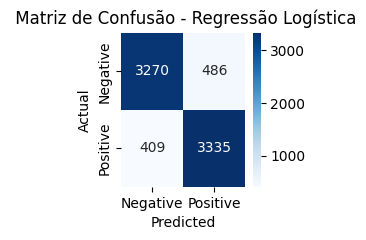

In [ ]:
plot_confusion_matrix(y_test, y_pred_rl, ' Matriz de Confusão - Regressão Logística', labels=['Negative', 'Positive'])

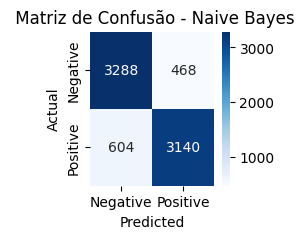

In [ ]:
plot_confusion_matrix(y_test, y_pred_nb, ' Matriz de Confusão - Naive Bayes', labels=['Negative', 'Positive'])

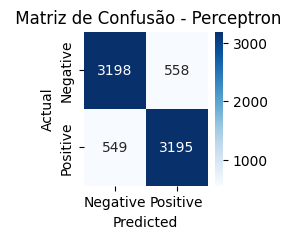

In [ ]:
plot_confusion_matrix(y_test, y_pred_p, ' Matriz de Confusão - Perceptron', labels=['Negative', 'Positive'])

Calcule métricas (acurácia, recall, precision, f1-score) para cada uma das predições.

In [ ]:
# Para cada um dos modelos produza as métricas pedidas.
print('--------------------------------------')
print('Regressão Logística:')
print(classification_report(y_test, y_pred_rl))
print('--------------------------------------')
print('\nNaive Bayes:')
print(classification_report(y_test, y_pred_nb))
print('--------------------------------------')
print('\nPerceptron:')
print(classification_report(y_test, y_pred_p))

--------------------------------------
Regressão Logística:
              precision    recall  f1-score   support

         neg       0.89      0.87      0.88      3756
         pos       0.87      0.89      0.88      3744

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500

--------------------------------------

Naive Bayes:
              precision    recall  f1-score   support

         neg       0.84      0.88      0.86      3756
         pos       0.87      0.84      0.85      3744

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

--------------------------------------

Perceptron:
              precision    recall  f1-score   support

         neg       0.85      0.85      0.85      3756
         pos       0.85      0.85      0.85      3744

    accuracy     

#### Perguntas

***Discuta sobre os resultados do modelo considerando as matrizes de confusão e as métricas calculadas.***

A média de acurácia de todos os modelos apresentou um desempenho excelente, aproximando-se de 90% (Regressão Logística: 88%, Naive Bayes: 86%, Perceptron: 85%), o que demonstra um elevado número de previsões corretas. Isso também é evidenciado pela métrica de precisão, em que todos alcançaram aproximadamente 87% de acertos nas previsões positivas.

Além disso, os resultados do f1-score foram satisfatórios, onde todos conseguiram resultado maiores que 0.80 (Regressão Logística: 0.88, Naive Bayes: 0.85, Perceptron: 0.85), quanto mais próximo de 1, melhor o desempenho do modelo.

Ao analisarmos a matriz de confusão, notamos que os resultados foram excelentes, uma vez que há uma notável discrepância entre os valores de falso positivo e falso negativo em comparação com os verdadeiros positivos e verdadeiros negativos.


## Interpretando os modelos

Uma subárea importante da aprendizagem de máquina é a interpretação dos modelos.

Nesta parte do laboratório, você deve implementar funções para facilitar a interpretação dos modelos treinados e responder algumas perguntas sobre eles.

### Implementando funções auxiliares

A seguir é pedido que você implemente duas funções.

A primeira delas **recupera_palavras_positivas** deve retornar as top-20 palavras que mais contribuem para a classificação do texto como positivo. A segunda **recupera_palavras_negativas** deve fazer o equivalente para a classificação negativa.

Os modelos de Regressão Logística e Perceptron tem um parâmetro chamado ***coef_*** este parâmetro retorna o peso de cada feature (palavra) tem no modelo. Palavras com peso positivo influenciam para a classificação positiva, e palavras com peso negativo fazem o inverso. O valor desse parâmetro tem a dimensão (1, n_features).

Já o modelo Naive Bayes tem um parâmetro chamado ***feature_log_prob_***. Este parâmetro retorna o log das probabilidades de cada palavra aparecer no texto dada uma classe. O valor desse parâmetro tem a dimensão (2, n_features), de modo que a posição 0 corresponde as probabilidades para a classe negativa e a posição para a classe positiva. Quanto maior for a probabilidade de uma palavra, maior podemos dizer que é sua influência na classificação.

Para acessar o nomes das features em ordem utilize o método **get_feature_names_out** do vetorizador construído.

Ambas as funções devem retornar uma lista de tuplas (string, float), ou seja, (palavra, peso).

In [ ]:
def recupera_palavras_positivas(modelo):
  if modelo == model_nb:
    coef = modelo.feature_log_prob_[1]
  else:
    coef = modelo.coef_[0]

  # mapeando coef com as palavras
  tokens_coef = {token: c for token, c in zip(vectorizer.get_feature_names_out(), coef)}
  # ordenando
  tokens_coef = sorted(tokens_coef.items(), key=lambda x: x[1], reverse=True)
  return tokens_coef[:20]

def recupera_palavras_negativas(modelo):
  if modelo == model_nb:
    coef = modelo.feature_log_prob_[0]
    tokens_coef = {token: c for token, c in zip(vectorizer.get_feature_names_out(), coef)}
    tokens_coef = sorted(tokens_coef.items(), key=lambda x: x[1], reverse=True)
    return tokens_coef[:20]


  coef = modelo.coef_[0]
  tokens_coef = {token: c for token, c in zip(vectorizer.get_feature_names_out(), coef)}
  tokens_coef = sorted(tokens_coef.items(), key=lambda x: x[1], reverse=False)
  return [(token, c *-1) for token, c in tokens_coef[:20]]

### Visualizando e interpretando

Use a função abaixo para visualizar uma nuvem de palavras do retorno das funções.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(lista_de_tuplas):
    # Cria um dicionário a partir da lista de tuplas
    palavra_freq = {t[0]: t[1] for t in lista_de_tuplas}

    # Cria a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palavra_freq)

    # Plota a WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#### Palavras positivas

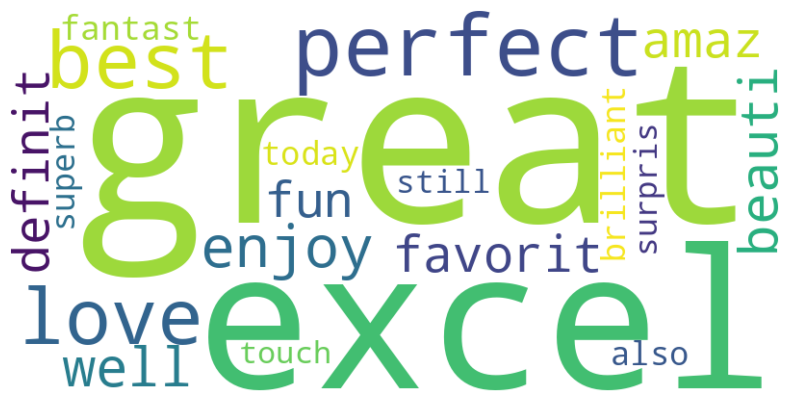

In [ ]:
# Plote aqui a nuvem de palavras para a Regressão Logística
rl_pos = recupera_palavras_positivas(model_rl)
plot_wordcloud(rl_pos)

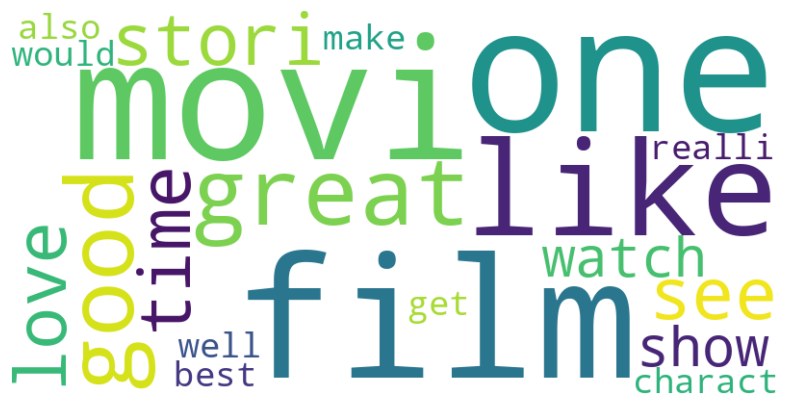

In [ ]:
# Plote aqui a nuvem de palavras para o Naive Bayes
nb_pos = recupera_palavras_positivas(model_nb)
plot_wordcloud(nb_pos)

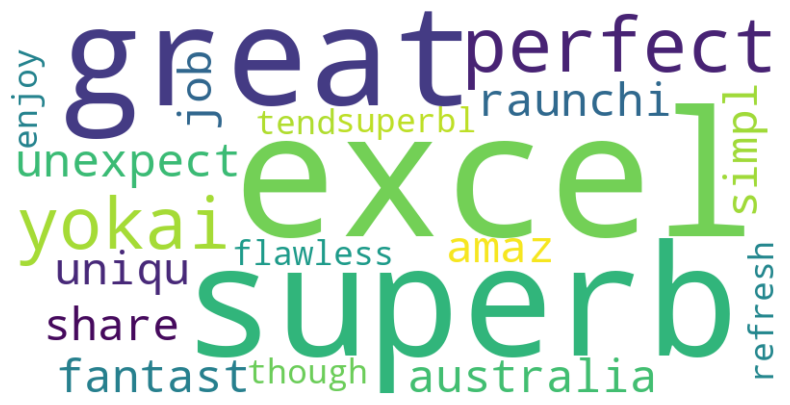

In [ ]:
# Plote aqui a nuvem de palavras para o Perceptron
p_pos = recupera_palavras_positivas(model_p)
plot_wordcloud(p_pos)

#### Palavras negativas

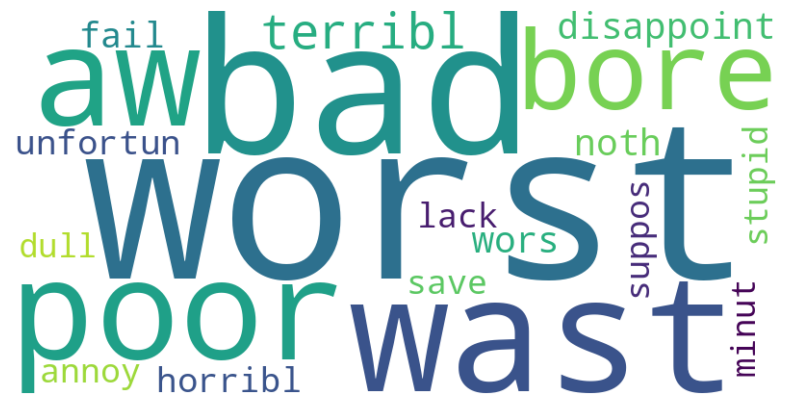

In [ ]:
# Plote aqui a nuvem de palavras para a Regressão Logística
rl_neg = recupera_palavras_negativas(model_rl)
plot_wordcloud(rl_neg)

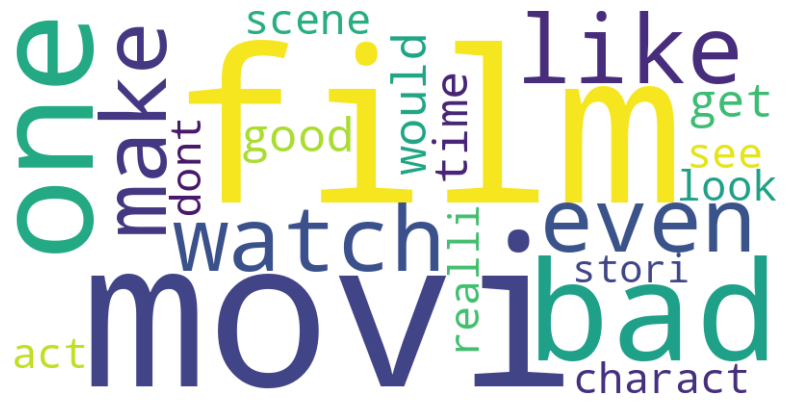

In [ ]:
# Plote aqui a nuvem de palavras para o Naive Bayes
nb_neg = recupera_palavras_negativas(model_nb)
plot_wordcloud(nb_neg)

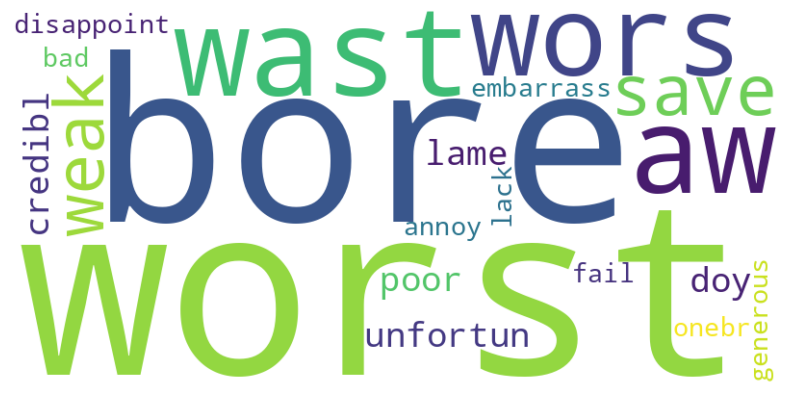

In [ ]:
# Plote aqui a nuvem de palavras para o Perceptron
p_neg = recupera_palavras_negativas(model_p)
plot_wordcloud(p_neg)

#### Perguntas

**1. Analisando as nuvens de palavras positivas de cada modelo, é possível identificar que as palavras estão associadas à um sentimento positivo? Dê exemplos.**

Sim, a palavra 'great' apareceram em todos os modelos, juntamente com outras palavras positivas como ‘excel’, ‘good’, ‘well’, e assim por diante. No entanto, é importante destacar que o modelo Naive Bayes obteve o pior desempenho em comparação com os outros modelos, uma vez que enfatiza palavras como 'movie' e 'film'.

**2. Analisando as nuvens de palavras negativas de cada modelo, é possível identificar que as palavras estão associadas à um sentimento negativo? Dê exemplos.**

Sim, em todos os modelos encontramos palavras como 'worst', 'wast', 'bad' e 'poor' associadas a um sentimento negativo. No entanto, é importante destacar que o modelo Naive Bayes mais uma vez apresentou o desempenho mais fraco em comparação com os demais, pois dá destaque a palavras como 'movie' e 'film', além de ainda identificar a palavra 'good' associada a um sentimento positivo.

**3. Considerando as métricas calculadas e a análise acima, qual modelo você acredita ser o melhor na tarefa? Por quê?**

O modelo de Regressão Logística se destacou com os melhores resultados, como evidenciado pelas métricas de f1-score, recall, precisão e acurácia, que apresentaram os valores mais elevados em comparação com os outros modelos. Além disso, a análise da nuvem de palavras tanto para sentimentos positivos quanto negativos revelou resultados excelentes.

## Testando mais modelos

Até então no exerício utilizamos três modelos de classificação, entretanto existem muitos outros disponíveis no sklearn. Escolha um dos três modelos para treinar e avaliar nos dados. Em seguida compare os resultados com os modelos anteriores.

- [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
- [Decision Tree](https://scikit-learn.org/stable/modules/tree.html#classification)
- [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html#classification)

In [ ]:
# Importe o modelo que será utilizado
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Treine aqui o modelo escolhido
tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
# Faça a previsão dos resultados
y_pred = tree_classifier.predict(X_test)
y_pred[:10]

array(['neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'neg'], dtype=object)

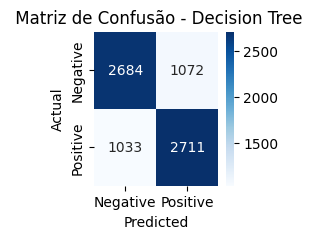

In [ ]:
# Avalie o modelo usando a matriz de confusão e as métricas anteriores
plot_confusion_matrix(y_test, y_pred, ' Matriz de Confusão - Decision Tree', labels=['Negative', 'Positive'])

In [ ]:
print('--------------------------------------')
print('Decision Tree:')
print(classification_report(y_test, y_pred))

--------------------------------------
Decision Tree:
              precision    recall  f1-score   support

         neg       0.72      0.71      0.72      3756
         pos       0.72      0.72      0.72      3744

    accuracy                           0.72      7500
   macro avg       0.72      0.72      0.72      7500
weighted avg       0.72      0.72      0.72      7500



### Perguntas

**1. Explique brevemente como o modelo que você escolheu funciona (a documentação do sklearn pode servir de fonte para esta resposta).**

Árvores de Decisão (DTs) é um método de aprendizagem supervisionada não paramétrica, aplicado tanto em classificação quanto em regressão. O propósito fundamental é criar um modelo capaz de prever o valor de uma variável alvo, baseando-se na aprendizagem de regras de decisão simples deduzidas dos rótulos dos dados.

A ideia central dessa abordagem é dividir os dados com base em características relevantes para criar uma estrutura de árvore que seja eficaz na tomada de decisões. O processo de construção da árvore tem início com a escolha de um atributo do conjunto de dados para a divisão dos exemplos em grupos. Posteriormente, os exemplos são subdivididos em subconjuntos, e o processo de divisão é aplicado recursivamente para cada subconjunto de dados em cada ramificação da árvore até atender a um critério de parada.

Para fazer uma previsão ou classificação utilizando a árvore de decisão, você inicia na raiz da árvore e prossegue pelos ramos conforme os valores das características do exemplo que se pretende classificar ou prever. Eventualmente, chega-se a um nó folha, onde cada nó folha representa uma classe.


**2. Como foi o desempenho do modelo escolhido em relação aos demais modelos?**

Ao analisarmos a tabela de métricas da Árvore de Decisão, observamos que os valores se aproximam de 70%, enquanto nos outros modelos a proximidade é de 90%. Concluímos, que o desempenho do modelo de Árvore de Decisão é inferior aos demais modelos testados.